In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В начале  изучим данные и подготовим их для анализа.

### Изучение общей информации

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.columns = map(str.lower, data.columns)#

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [72]:
data.duplicated().sum()

0

В датасете 16715 строк, 11 столбцов. Мы видим, что есть небольшое количество пропусков в столбцах 'name','year_of_release','genre'. В столбцах с оценками критиков и пользователей, а также ESRB-рейтинге. Метод обработки этих пропусков рассмотрим в дальнейшем. Что касается типа данных, в столбце с годом релиза тип данных следует заменить на целочисленный,также в столбце с оценками критиков, все значения целые, тип данных можно заменить на int. В столбце с оценками пользователей данные числовые, следовательно тип данных должен быть float. Явные дубликаты отсутствуют.

### Подготовка данных

In [8]:
data['critic_score'] = data['critic_score'].astype('Int64')

In [9]:
#data['user_score'] = data['user_score'].astype('float64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


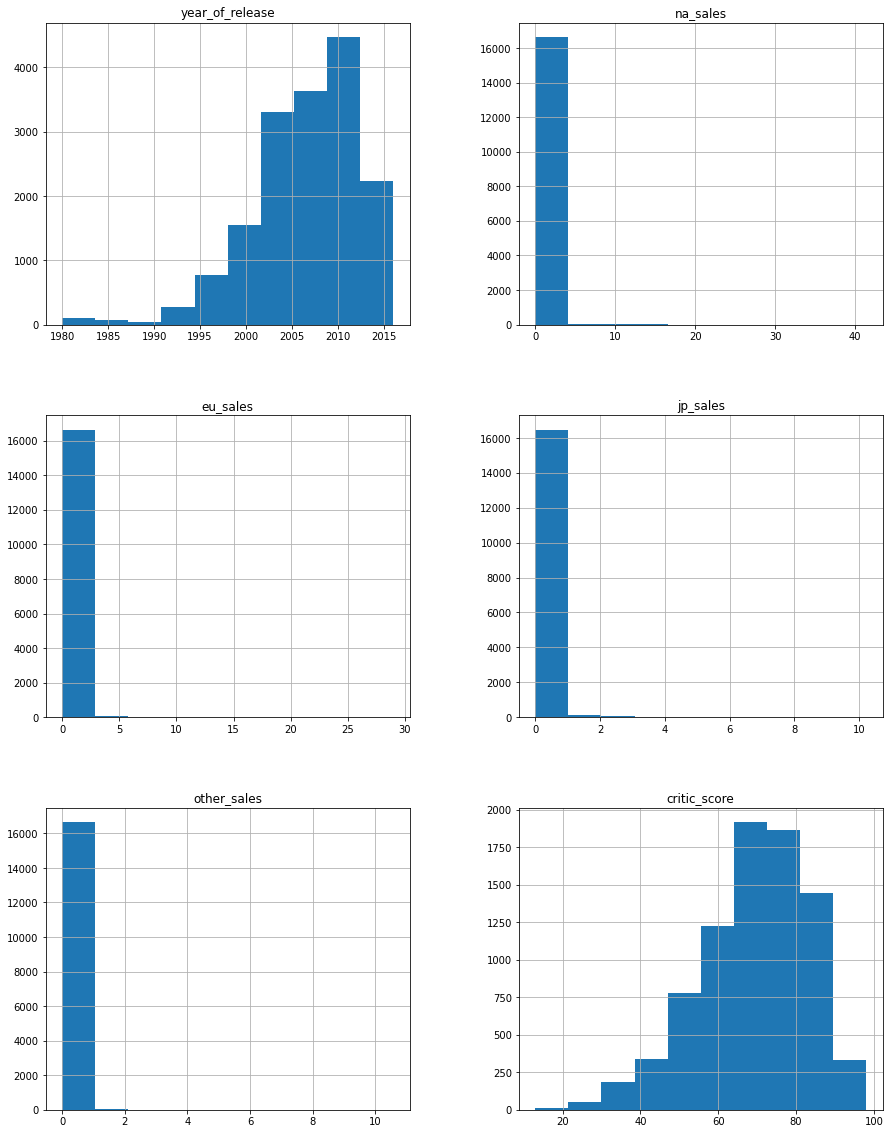

In [11]:
data.hist(figsize=(15,20));

На графиках распределения значений по столбцам, можно предположить, что небольшое количество значений, выбивающееся из общего количества данных в столбцах с продажами по странам, это выбросы, но данное предположение требует дальнейшей проверки.

In [12]:
data.isna().sum()#количество пропущенных значений

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [13]:
#(data.isna().sum()/len(data)).round(4)*100#процент пропусков

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

In [76]:
data.isna().mean()*100#процент пропусков

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [14]:
data[['name','year_of_release','genre','critic_score','user_score','rating']].isna().corr()

,name,year_of_release,genre,critic_score,user_score,rating
name,1.000000,-0.001399,1.000000,0.010654,0.013373,0.013265
year_of_release,-0.001399,1.000000,-0.001399,-0.021924,-0.013428,-0.020232
genre,1.000000,-0.001399,1.000000,0.010654,0.013373,0.013265
critic_score,0.010654,-0.021924,0.010654,1.000000,0.787438,0.782945
user_score,0.013373,-0.013428,0.013373,0.787438,1.000000,0.974292
rating,0.013265,-0.020232,0.013265,0.782945,0.974292,1.000000


По матрице корелляции пропущенных значений можно увидеть, что значения 'critic_score','user_score','rating' кореллируют между собой, т е изменение или удаление одних значений повлияет на другие, кроме того процент пропусков в данных столбцах более 40, поэтому удалять их нецелесообразно, оставим пропуски в этих столбцах нетронутыми.
В столбцах 'name','genre' процент пропусков равен 0.01, а значит их удаление не повлечет перекос данных.

In [15]:
data2 = data.copy()

In [16]:
data2.dropna(subset=['name','genre'],inplace=True)

In [17]:
data2.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Нет корректного варианта заполнения пропусков в дате выхода,их количество менее 2 процентов, поэтому можно их оставить нетронутыми.

In [18]:
data2['year_of_release'] = data2['year_of_release'].astype('Int64')

In [19]:
data2['rating'] = data2['rating'].fillna('unknown')

In [20]:
data2.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

Большое количество пропусков в последних 3 столбцах можно объяснить тем,что не все компьютерные игры получают оценку критиков и не все пользователи оставляют свои оценки. По данныи из поисковой системы Entertainment Software Rating Board (ESRB) была основана в 1994 году. В датасете же данные об играх с 1980 года, естественно, что данный рейтинг существует не для всех изданий.

In [21]:
data2['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [22]:
data2.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,<NA>,tbd,E


Согласно данным, полученным из поисковой системы, аббревиатура "tbd" может означать, что рейтинг не определен, п опричине того, что производитель не предоставил пользователям возможности выставить рейтинг игре. 

In [23]:
data2.loc[data2['user_score']=="tbd",'user_score']=np.nan#заменим значения на пропуски

In [24]:
data2['user_score'] = data2['user_score'].astype('float64')

In [25]:
#суммарные продажи 
data2['sum_sales'] =data2[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


### Исследовательский анализ данных

In [79]:
#количество игр по годам
data2.pivot_table(index=['year_of_release','platform'],values='name', aggfunc='count') 

name
year_of_release platform      
1980            2600         9
1981            2600        46
1982            2600        36
1983            2600        11
                NES          6
...                        ...
2016            PSV         85
                Wii          1
                WiiU        14
                X360        13
                XOne        87

[238 rows x 1 columns]

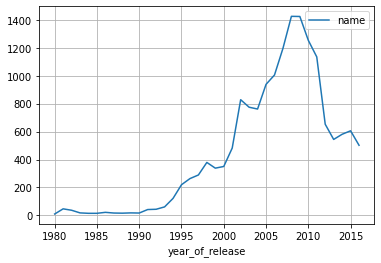

In [82]:
#общее количество выпускаемых игр по годам
data2.pivot_table(index=['year_of_release'],values='name', aggfunc='count').plot(grid=True); 

Как видно из графика с 1980 по 1994 год производство игр было не очень многочисленно. Далее количество увеличивалось и к 2008-2009 годам достигло своего пика, потом нова пошло на спад. В принципе период до 1995 года не очень интересен в плане исследования.

 

In [27]:
#суммарные продажи по платформам 
platform_sum = data2.pivot_table(index='platform',values='sum_sales', aggfunc='sum')
platform_sum.sort_values(by='sum_sales', ascending =False).head(10)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [29]:
max_sales = np.array(['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC']).tolist()

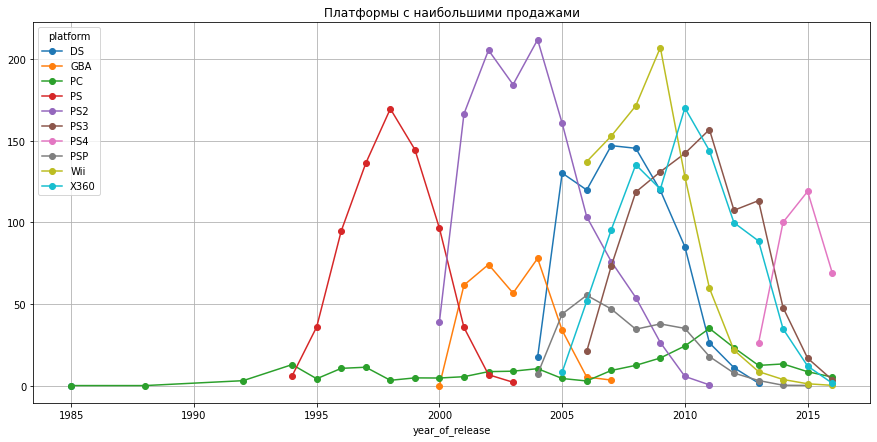

In [30]:
(data2
.query('platform in @max_sales and year_of_release!="9999"')
.pivot_table(index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum')
.plot(kind='line',style='o-',title='Платформы с наибольшими продажами',grid=True,figsize=(15,7))
);
#plt.legend()#bbox_to_anchor=(1,1))
# plt.show()

На графике распределения продаж платформ по годам, можно проследить закономерность, что примерный "срок жизни" платформы около 10 лет, на 5-6 году жизни платформа достигает пика продаж. Из всех платформ с максимальными продажами только PC существует около 30 лет, но продажи равномерны, без взлётов. Новые платформы появляются практически ежегодно.

Для построения прогноза на 2017 год возьмём данные за предыдущие 3 года:2014,2015 и 2016.

In [31]:
new_data = data2.query('2014<=year_of_release<=2016')#срез по актуальному периоду
new_data.head()
#data2[data2['year_of_release']=='2015.0']#,'2015','2016']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.98


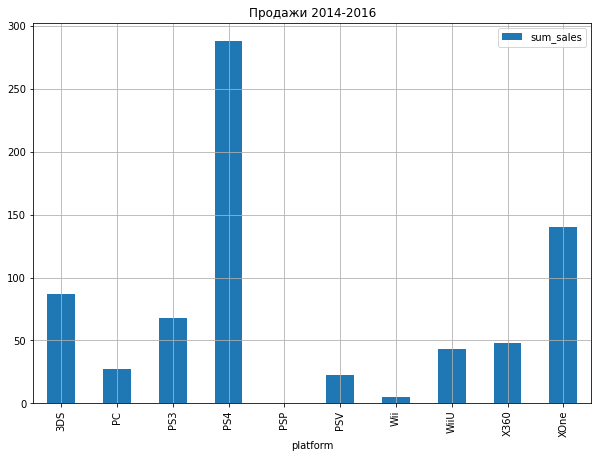

In [32]:
(new_data
 .pivot_table(index='platform',values='sum_sales',aggfunc='sum')
 .plot(kind='bar',title='Продажи 2014-2016',grid=True,figsize=(10,7))
);

По гистограмме распределения изменения продаж по платформам в 2014-2016 гг. видно, что лидерами по общему количеству проданных копий являются 4 (более 50 млн.) плтаформы:"3DS","XOne","PS4","PS3"

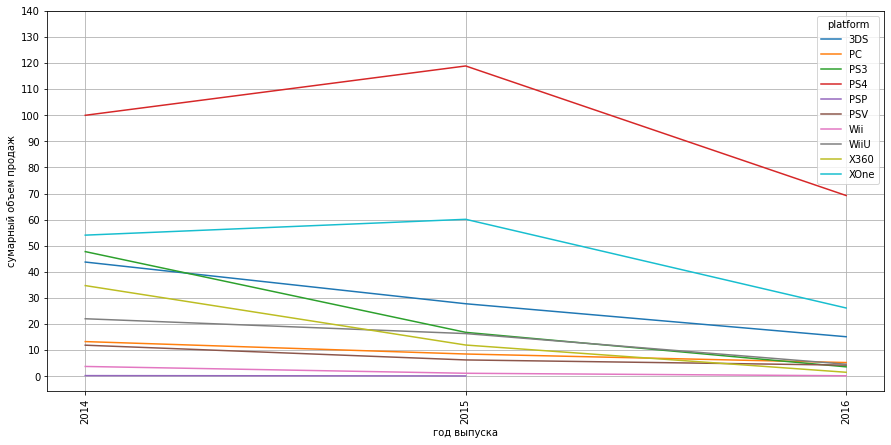

In [33]:
(new_data
 .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
 .plot(
     grid=True,
     figsize=(15, 7),
     xlabel='год выпуска',
     ylabel='сумарный объем продаж',
     #cmap='tab20'
     #linewith=3
 )
)
plt.xticks(np.arange(2014, 2017, 1), rotation='vertical');
plt.yticks(np.arange(0, 150, 10));

Однако на графике зависимости суммарных продаж по годам выпуска продажи по всем платформам стремятся на понижение. Если не заглядывать далеко в будущее, то большую прибыль пока дают и будут давать в 2017 году платвформы XOne и PS4, но не известно в течении какого срока. Также есть платформы со стабильными продажами, без резких подъемов и спусков, такие как 3DS,PC,PSV. Возможно их продажи и дальше будут приносить стабильную, но небольшую прибыль

### Глобальные продажи игр в разбивке по платформам

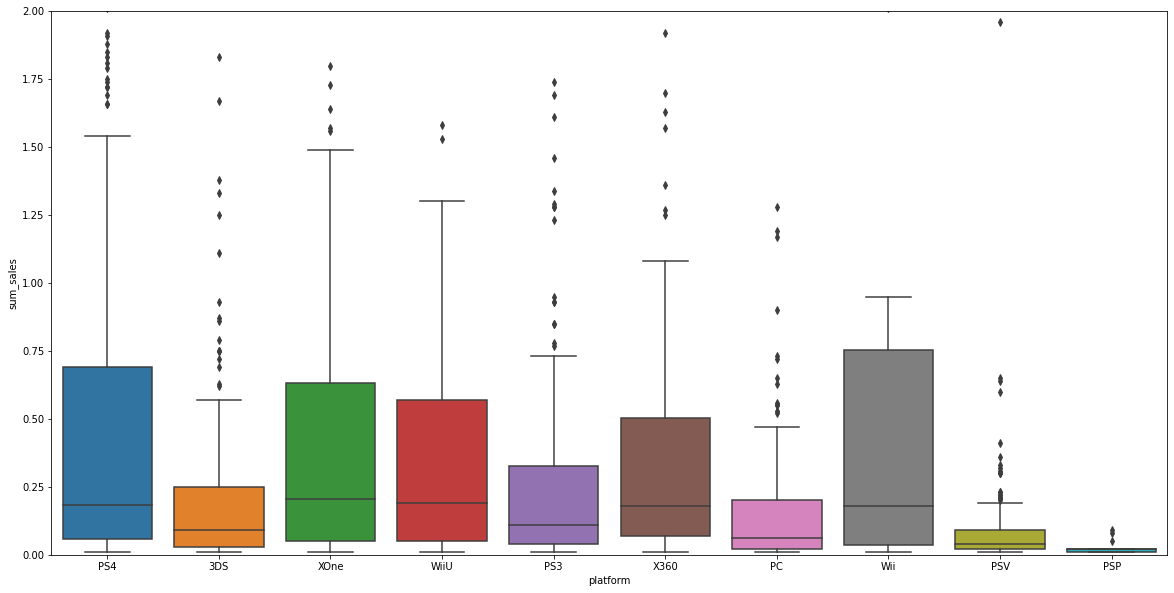

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_data, x='platform', y='sum_sales')
plt.ylim(0, 2);

Медианы показывают в целом прибыльность той или иной платформы. Большое количество выбросов на некоторых платформах можно объяснить выпуском под них неких слишком дорогих и не особоенно популярных продуктов.
В нашем датасете есть данные о продажах отдельных игр в общем. Но ничего не известно входят ли в эти значения продажи внутри игры. Ну например, если сюда входят продажи внутри самой игры, то ассиметрию можно объяснить например тем, что значительное число покупателей игр не тратит деньги на покупки внутри игры.
Кроме того,вполне возможно выбросы и значительные перекосы могут быть вследствии того, что выпускаются игры сигмента ААА. Их мало, но они очень дорогие. Или выпускаются некие подарочные или специальные издания, доля продаж которых значительно меньше, но цена оказывает общее влияние на картину продаж в целом по платформе. 

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Рассмотрим платформу PS4, построим для нее диаграмму рассеяния оценки критиков и пользователей и рассчитаем корелляцию

In [35]:
ps = new_data[new_data['platform']=='PS4']

In [36]:
ps['user_score'] = ps['user_score'].fillna(-1)
ps['critic_score'] = ps['critic_score'].fillna(-1)

/tmp/ipykernel_31/350987213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps['user_score'] = ps['user_score'].fillna(-1)
/tmp/ipykernel_31/350987213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps['critic_score'] = ps['critic_score'].fillna(-1)


In [37]:
ps['critic_score'] = ps['critic_score'].astype('float64')

/tmp/ipykernel_31/809126180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps['critic_score'] = ps['critic_score'].astype('float64')


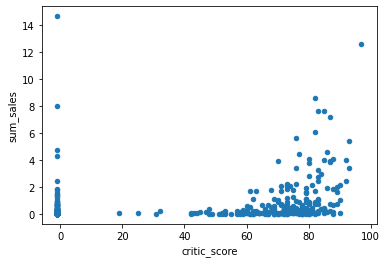

In [38]:
ps.sort_values('critic_score').plot(x='critic_score', y='sum_sales', kind='scatter'); 
plt.show()

In [39]:
ps[ps['critic_score'] > 0]['critic_score'].corr(ps['sum_sales'])

0.40266141068104083

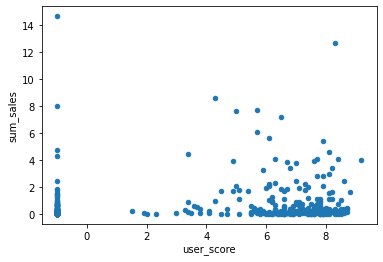

In [40]:
ps.sort_values('user_score').plot(x='user_score', y='sum_sales', kind='scatter'); 
plt.show()

In [41]:
ps[ps['user_score'] > 0]['user_score'].corr(ps['sum_sales'])

-0.040131589472697356

Что касается выбранной мной платформы, мы видим прямую связь продаж с оценками критиков и обратную с оценками пользователей, пусть и не очень большую. Можно сделать вывод, что любой пиар - хороший или плохой идет на пользу продажам.

Соотнесем с продажами игр на других платформах

In [42]:
new_data['user_score'] = new_data['user_score'].fillna(-1)
new_data['critic_score'] = new_data['critic_score'].fillna(-1)
new_data['critic_score'] = new_data['critic_score'].astype('float64')
new_data['user_score'] = new_data['user_score'].astype('float64')

/tmp/ipykernel_31/3703636053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['user_score'] = new_data['user_score'].fillna(-1)
/tmp/ipykernel_31/3703636053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['critic_score'] = new_data['critic_score'].fillna(-1)
/tmp/ipykernel_31/3703636053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

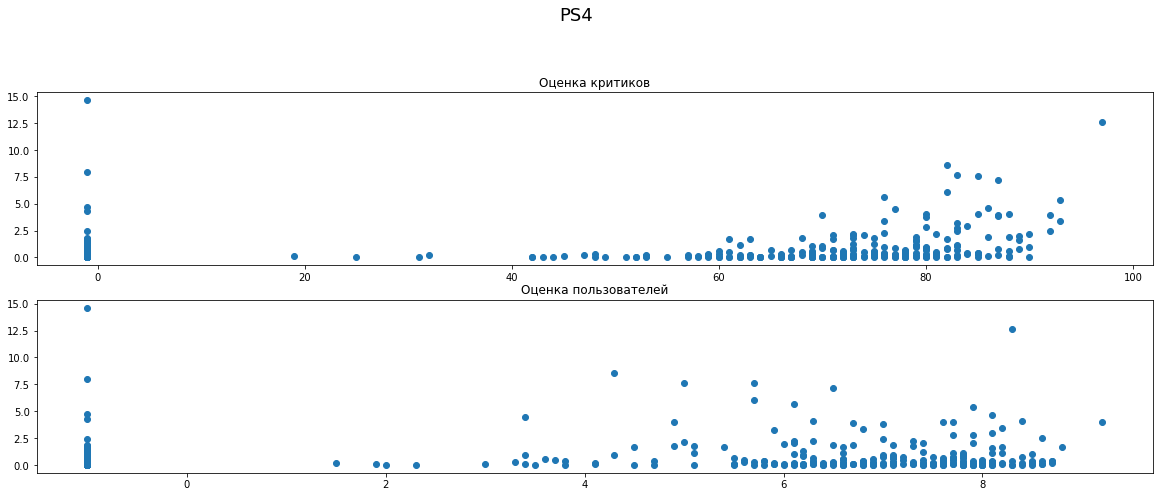

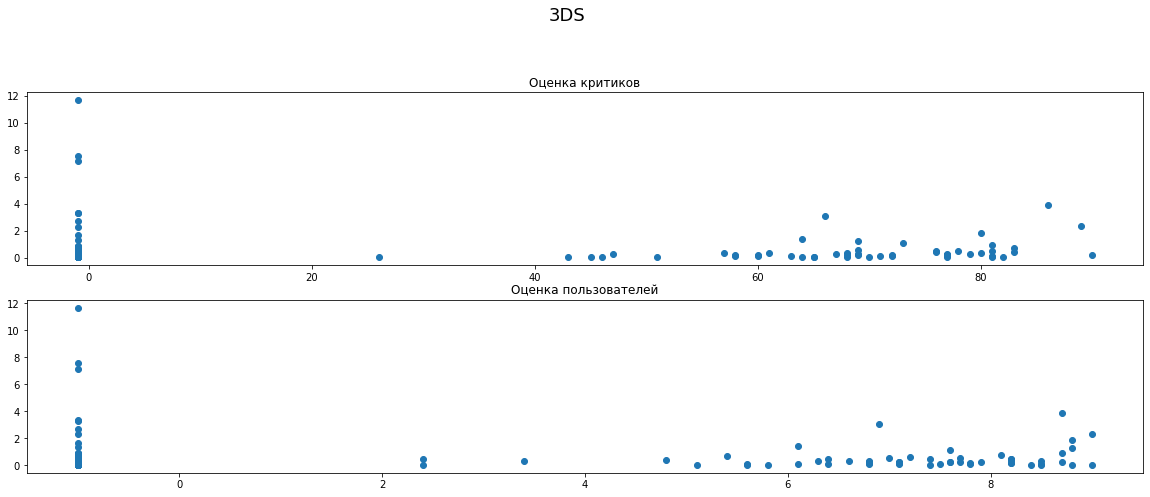

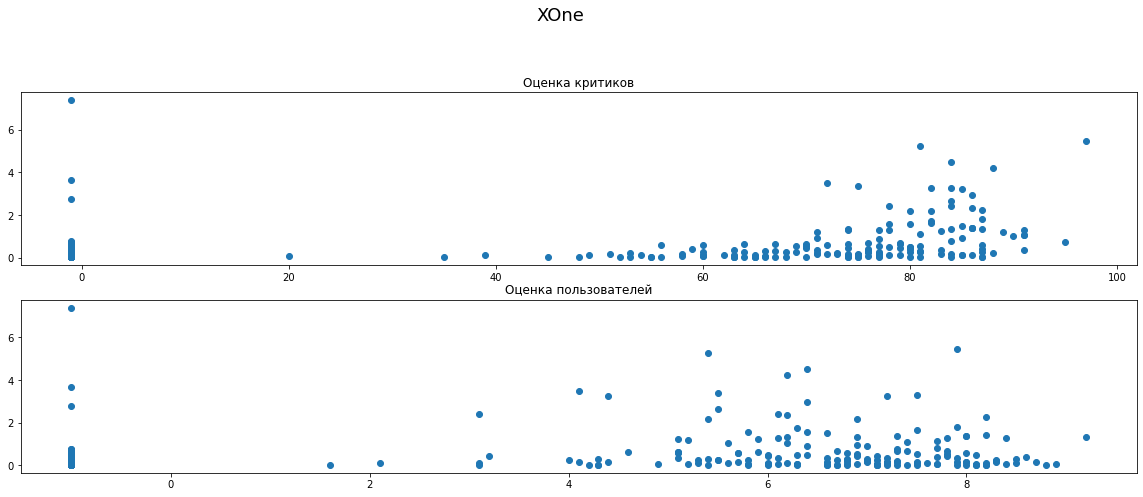

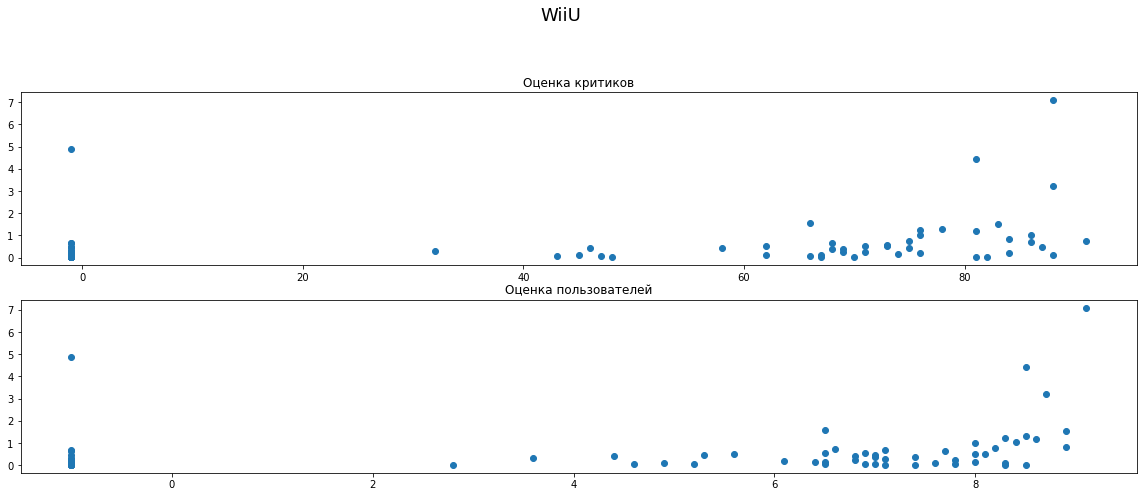

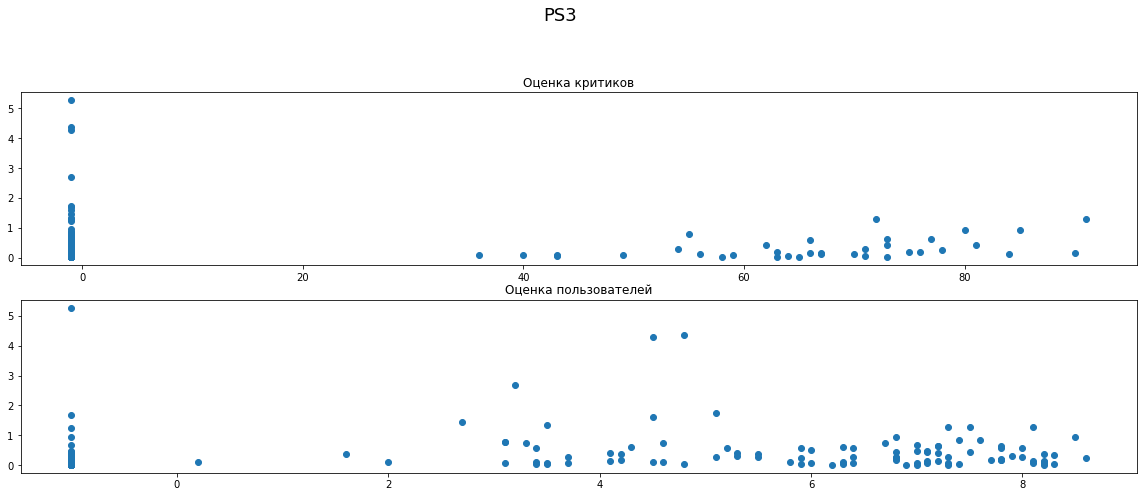

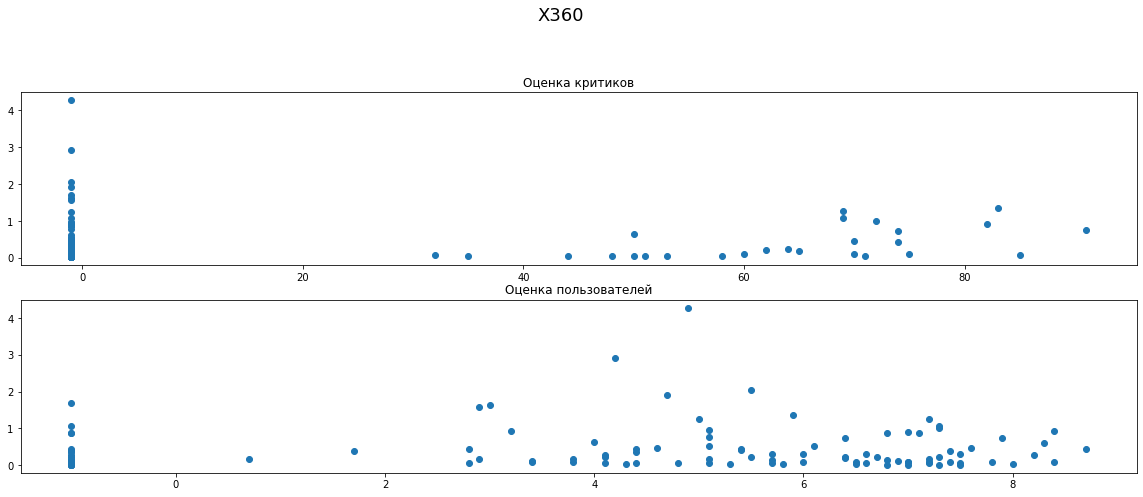

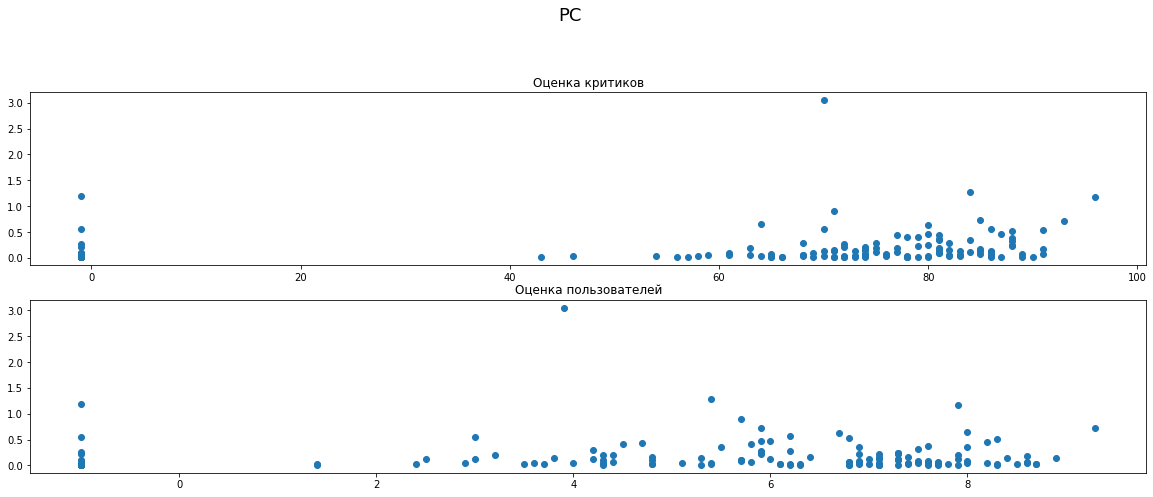

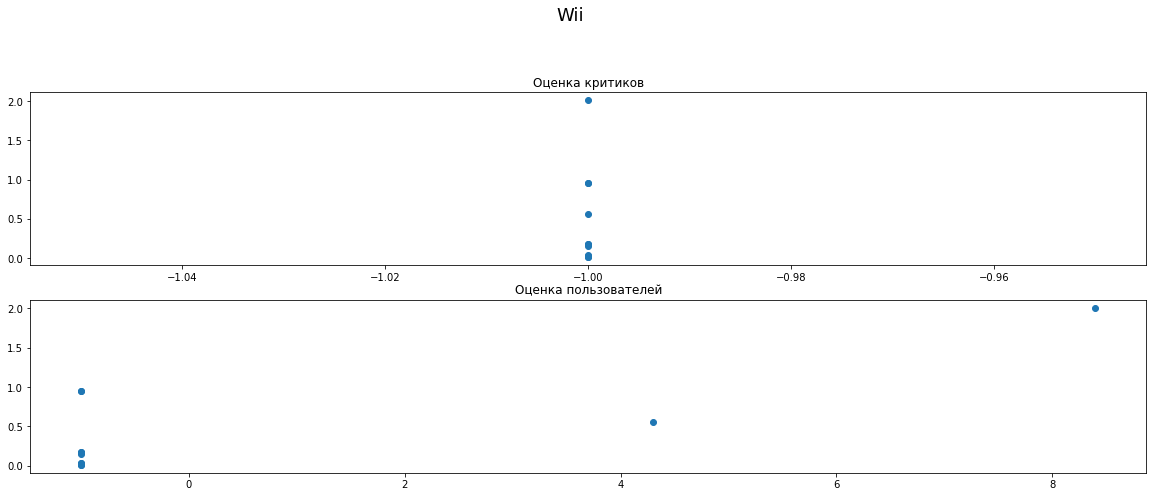

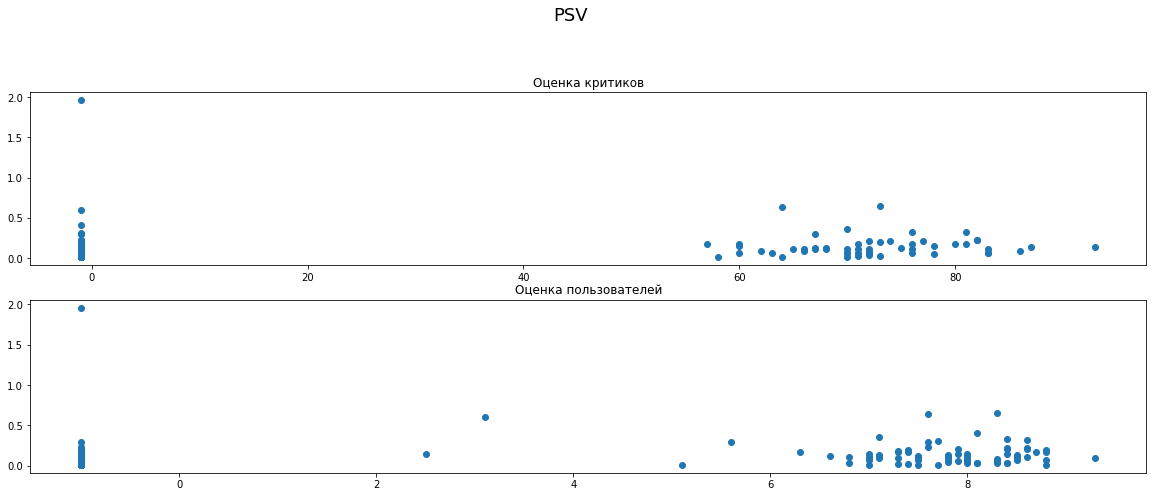

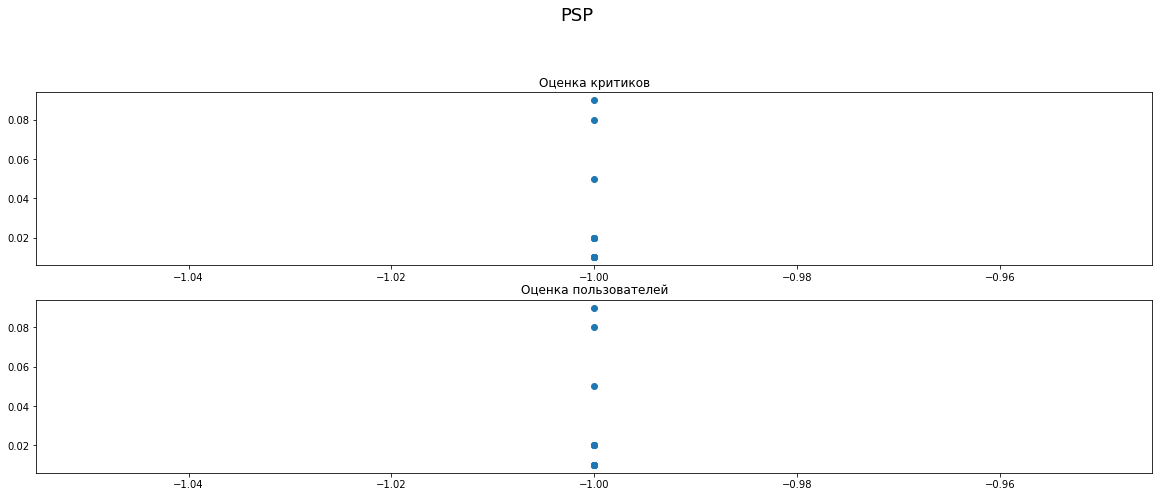

In [43]:
for platform in new_data['platform'].unique():
    fig_scatter, (scatter_1, scatter_2) = plt.subplots(2, 1, figsize=(20, 7))
    plt.suptitle(platform, y=1.05, fontsize=18)
    scatter_1.scatter(x='critic_score', y='sum_sales', data=new_data[new_data['platform'] == platform])
    scatter_1.set_title('Оценка критиков', fontsize=12)
    scatter_2.scatter(x='user_score', y='sum_sales', data=new_data[new_data['platform'] == platform])
    plt.title('Оценка пользователей', fontsize=12) 

In [44]:
for platform in new_data['platform'].unique():
    print(f'{platform}')
    print('корреляция по оценке критиков', 
          new_data[new_data['critic_score'] > 0]['critic_score'].corr(new_data['sum_sales']))
    print('корреляция по оценке пользователей', 
          new_data[new_data['user_score']> 0]['user_score'] .corr(new_data['sum_sales']))
   #print('-'*20)

PS4
корреляция по оценке критиков 0.328105086966363
корреляция по оценке пользователей -0.013070305002484585
3DS
корреляция по оценке критиков 0.328105086966363
корреляция по оценке пользователей -0.013070305002484585
XOne
корреляция по оценке критиков 0.328105086966363
корреляция по оценке пользователей -0.013070305002484585
WiiU
корреляция по оценке критиков 0.328105086966363
корреляция по оценке пользователей -0.013070305002484585
PS3
корреляция по оценке критиков 0.328105086966363
корреляция по оценке пользователей -0.013070305002484585
X360
корреляция по оценке критиков 0.328105086966363
корреляция по оценке пользователей -0.013070305002484585
PC
корреляция по оценке критиков 0.328105086966363
корреляция по оценке пользователей -0.013070305002484585
Wii
корреляция по оценке критиков 0.328105086966363
корреляция по оценке пользователей -0.013070305002484585
PSV
корреляция по оценке критиков 0.328105086966363
корреляция по оценке пользователей -0.013070305002484585
PSP
корреляция по

По всем показателям существует корелляция по оценке критиков.

### Общее распределение игр по жанрам

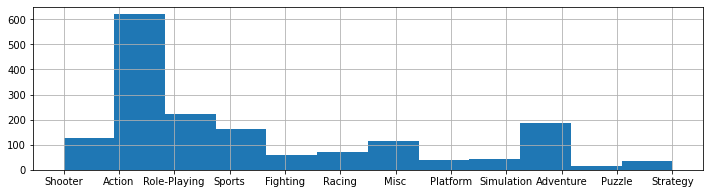

In [45]:
new_data['genre'].hist(bins=12, figsize=(12, 3));#распределение по жанрам

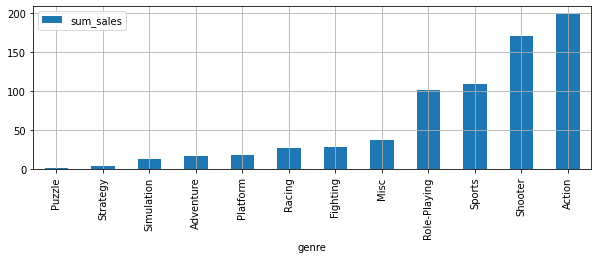

In [46]:
(new_data
 .pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values('sum_sales')
 .plot(grid=True, kind='bar', figsize=(10, 3))
);#распределение по продаваемости

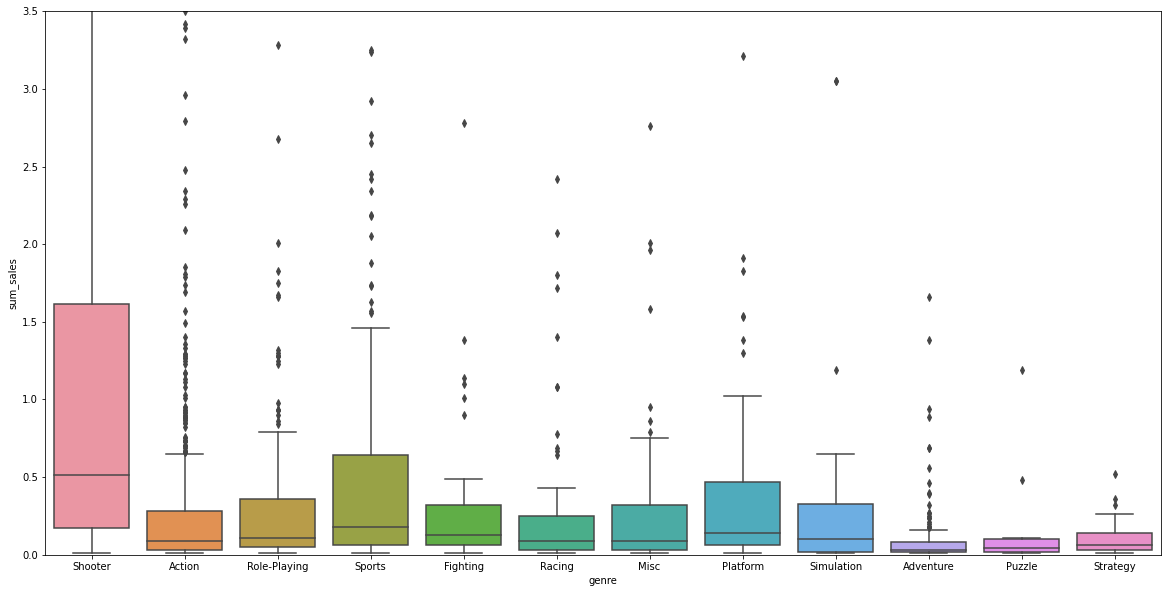

In [47]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_data, x='genre', y='sum_sales')
plt.ylim(0, 3.5);

Наиболее распространенный жанр игр - Action, к наиболее продаваемым относятся - Action и Shooter. По диаграммам размаха видно, что каждый показатель имеет много выбросов, есть перекосы и распределение неравномерное.

### Портрет пользователя каждого региона

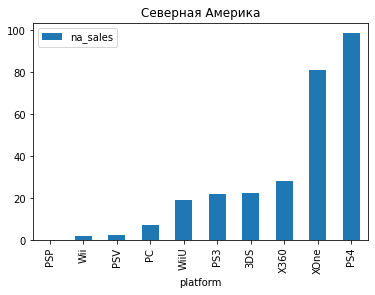

In [48]:
#Топ-5 платформ в Севреной Америке
new_data.pivot_table(index='platform',
                      values='na_sales',
                      aggfunc='sum').sort_values('na_sales').\
                                            plot(kind='bar',
                                            y='na_sales',
                                            title='Северная Америка');

In [49]:
new_data.pivot_table(index='platform',
                      values='na_sales',
                      aggfunc='sum').sort_values('na_sales', ascending=False).head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


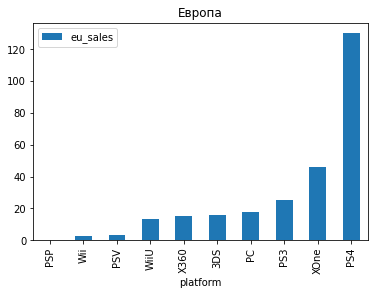

In [50]:
#Топ-5 платформ в Европе
new_data.pivot_table(index='platform',
                      values='eu_sales',
                      aggfunc='sum').sort_values('eu_sales').\
                                            plot(kind='bar',
                                            y='eu_sales',
                                            title='Европа');

In [51]:
new_data.pivot_table(index='platform',
                      values='eu_sales',
                      aggfunc='sum').sort_values('eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


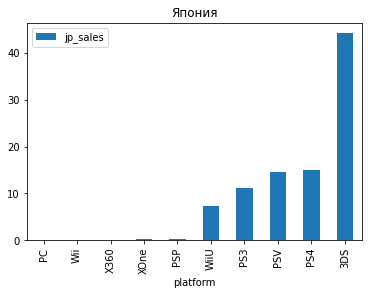

In [52]:
#Топ-5 Япония
new_data.pivot_table(index='platform',
                      values='jp_sales',
                      aggfunc='sum').sort_values('jp_sales').\
                                            plot(kind='bar',
                                            y='jp_sales',
                                            title='Япония');

In [53]:
new_data.pivot_table(index='platform',
                      values='jp_sales',
                      aggfunc='sum').sort_values('jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


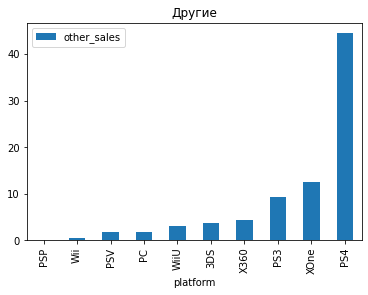

In [54]:
#Топ-5 другие страны
new_data.pivot_table(index='platform',
                      values='other_sales',
                      aggfunc='sum').sort_values('other_sales').\
                                            plot(kind='bar',
                                            y='other_sales',
                                            title='Другие');

In [55]:
new_data.pivot_table(index='platform',
                      values='other_sales',
                      aggfunc='sum').sort_values('other_sales', ascending=False).head()

,other_sales
platform,
PS4,44.48
XOne,12.52
PS3,9.37
X360,4.35
3DS,3.68


Во всех странах, кроме Японии в лидерах оказались PS4 и XOne. В Северной Америке и Европе достаточно большие продажи игр, в Японии и других странах несколько ниже, да и вообще картина популярных платформ в Японии отличается от всего мира.

Жанры по странам

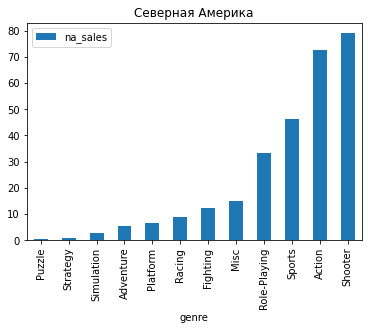

In [56]:
new_data.pivot_table(index='genre',
                      values='na_sales',
                      aggfunc='sum').sort_values('na_sales').\
                                            plot(kind='bar',
                                            y='na_sales',
                                            title='Северная Америка');

In [57]:
new_data.pivot_table(index='genre',
                      values='na_sales',
                      aggfunc='sum').sort_values('na_sales', ascending=False).head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


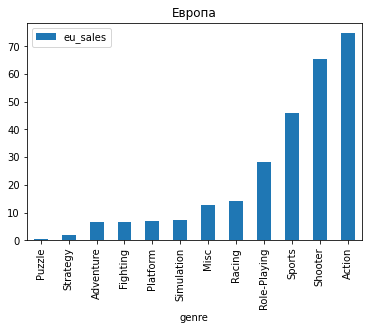

In [58]:
new_data.pivot_table(index='genre',
                      values='eu_sales',
                      aggfunc='sum').sort_values('eu_sales').\
                                            plot(kind='bar',
                                            y='eu_sales',
                                            title='Европа');

In [59]:
new_data.pivot_table(index='genre',
                      values='eu_sales',
                      aggfunc='sum').sort_values('eu_sales', ascending=False).head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


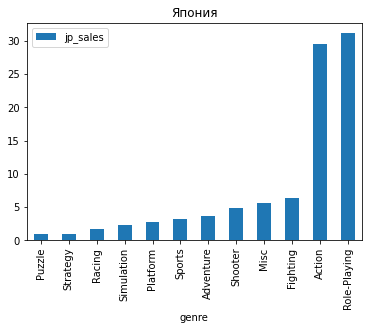

In [60]:
new_data.pivot_table(index='genre',
                      values='jp_sales',
                      aggfunc='sum').sort_values('jp_sales').\
                                            plot(kind='bar',
                                            y='jp_sales',
                                            title='Япония');

In [61]:
new_data.pivot_table(index='genre',
                      values='jp_sales',
                      aggfunc='sum').sort_values('jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


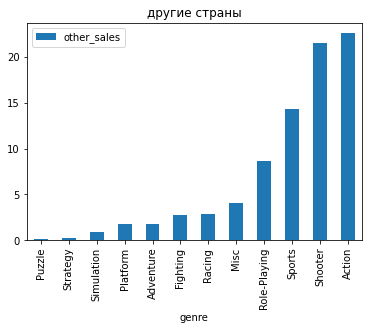

In [62]:
new_data.pivot_table(index='genre',
                      values='other_sales',
                      aggfunc='sum').sort_values('other_sales').\
                                            plot(kind='bar',
                                            y='other_sales',
                                            title='другие страны');

In [63]:
new_data.pivot_table(index='genre',
                      values='other_sales',
                      aggfunc='sum').sort_values('other_sales', ascending=False).head()

,other_sales
genre,
Action,22.57
Shooter,21.53
Sports,14.36
Role-Playing,8.64
Misc,4.03


Среди популярных жанров во всех странах, кроме Японии преобладает Action, Shooter,Sports. В Японии к жанру Action ддобавились Role-playing и Fighting. 
Из всего вышесказанного можно сделать вывод, что для всех стран кроме Японии стратегия развития игр привержена одним и тем же тенденциям.

Влияние на продажи рейтинга ESRB

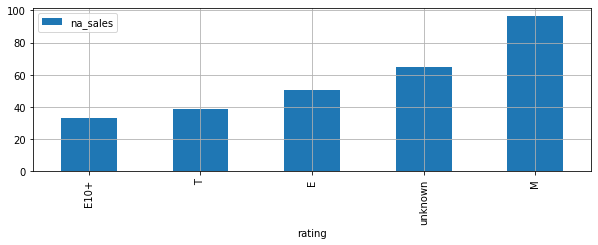

In [64]:
new_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales').\
    plot(grid=True, kind='bar', figsize=(10, 3));

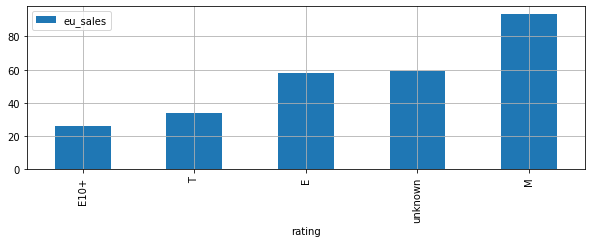

In [65]:
new_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales').\
    plot(grid=True, kind='bar', figsize=(10, 3));

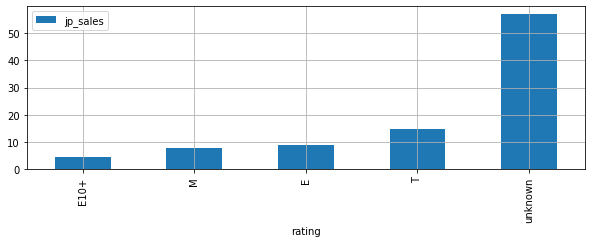

In [66]:
new_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales').\
    plot(grid=True, kind='bar', figsize=(10, 3));

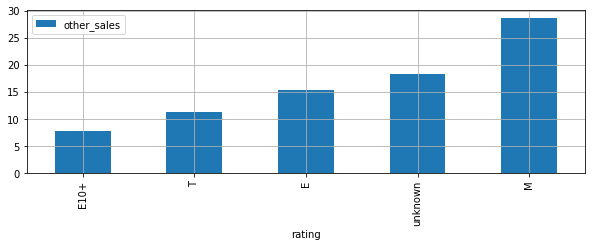

In [67]:
new_data.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values('other_sales').\
    plot(grid=True, kind='bar', figsize=(10, 3));

Портреты пользователей по странам
Северная Америка
Лидер по продажам.
Выбирает XOne, PS4 и PS3.
По жанрам предпочитает Action, Shooter, Sports.
По категориям будет покупать для взрослых - M, базовые - E и unknown.
Совсем детские игры не интересуют. 
Европа
Тоже достаточное прибыльное место для продаж.
Пользователь из Европы выбирает PS4, XOne и X360. 
По жанрам такое же распределение - Action, Shooter, Sports.
По возростной категории базовый - M, базовые - E и unknown.
Япония
Выбирает 3DS, PS4 и PSV.
Жанры в корне отличаются от других регионов - Role-Playing, Action, Fighting.
К возрастной категории по большей части E и Т, unknown.
Другие страны
Выбирают XOne, PS3 и PS4. 
Играть в Action, Shooter, Sports.
По возрастной категории это M, E и unknown. Категории, как у всех.

### Проверка гипотез
   H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [68]:
from scipy import stats as st
import numpy as np

xbox_one = new_data.loc[(new_data['platform'] == 'XOne') & (new_data['user_score'] > 0), 'user_score']
pc = new_data.loc[(new_data['platform'] == 'PC') & (new_data['user_score'] > 0), 'user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xbox_one, 
    pc,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [69]:
print('Среднее оценок пользователей для XBox', xbox_one.mean())
print('Среднее оценок пользователей для PC', pc.mean())

Среднее оценок пользователей для XBox 6.594545454545456
Среднее оценок пользователей для PC 6.298360655737705


Значение p-value говорит, что вероятность случайно получить такое или большее различие равнa примерно 54%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средним в этих выборках. Значение p-value тут выше уровня крититческой значимости.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
H1: Средние пользовательские рейтинги жанров Action и Sports разные.


In [70]:
action = new_data.loc[(new_data['genre'] == 'Action') & (new_data['user_score'] > 0), 'user_score']
sports = new_data.loc[(new_data['genre'] == 'Sports') & (new_data['user_score'] > 0), 'user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action, 
    sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [71]:
print('Средние пользовательские рейтинги жанров Action', action.mean())
print('Средние пользовательские рейтинги жанров Sports', sports.mean())

Средние пользовательские рейтинги жанров Action 6.760606060606061
Средние пользовательские рейтинги жанров Sports 5.2251968503937


Значение p-value очень низкое. Вероятность получить одинаковые средние пользовательские рейтинги отсутствует.

### Общий вывод

В процессе изучения датасета с информацией об игровых платформам в разрезе разных стран и лет для прогнозирования тактики поведения на 2017 год были получены следующие выводы:
1. На графике распределения продаж платформ по годам, можно проследить закономерность, что примерный "срок жизни" платформы около 10 лет, на 5-6 году жизни платформа достигает пика продаж. Из всех платформ с максимальными продажами только PC существует около 30 лет, но продажи равномерны, без взлётов. Новые платформы появляются практически ежегодно.

2. Для построения прогноза на 2017 год были взяты данные за предыдущие 3 года:2014,2015 и 2016.
3. По гистограмме распределения изменения продаж по платформам в 2014-2016 гг. видно, что лидерами по общему количеству проданных копий являются 4 (более 50 млн.) плтаформы:"3DS","XOne","PS4","PS3"
4. На графике зависимости суммарных продаж по годам выпуска продажи по всем платформам стремятся на понижение. Если не заглядывать далеко в будущее, то большую прибыль пока дают и будут давать в 2017 году платвформы XOne и PS4, но не известно в течении какого срока. Также есть платформы со стабильными продажами, без резких подъемов и спусков, такие как 3DS,PC,PSV. Возможно их продажи и дальше будут приносить стабильную, но небольшую прибыль.
5. Для отдельного изучения была выбрана платформа PS4, мы видим прямую связь продаж с оценками критиков и обратную с оценками пользователей, пусть и не очень большую. Можно сделать вывод, что любой пиар - хороший или плохой идет на пользу продажам.
6. Наиболее распространенный жанр игр - Action, к наиболее продаваемым относятся - Action и Shooter. По диаграммам размаха видно, что каждый показатель имеет много выбросов, есть перекосы и распределение неравномерное.
7. Во всех странах, кроме Японии в лидерах оказались PS4 и XOne. В Северной Америке и Европе достаточно большие продажи игр, в Японии и других странах несколько ниже, да и вообще картина популярных платформ в Японии отличается от всего мира.
8. Среди популярных жанров во всех странах, кроме Японии преобладает Action, Shooter,Sports. В Японии к жанру Action ддобавились Role-playing и Fighting. Из всего вышесказанного можно сделать вывод, что для всех стран кроме Японии стратегия развития игр привержена одним и тем же тенденциям.
9. Также были составлены портреты пользователей по разным странам. Все они примерно схожи, не считая Японии, игровая индустрия в ней идет по своему пути.
10. Проверены две гипотезы:    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Первую - не отвергли, вторую - отвергли